In [12]:
# Import pandas library
import pandas as pd

# Now, load your CSV file
data = pd.read_csv("synthetic_social_media_data.csv")

# Display the first few rows of the dataset to confirm it's loaded
data.head()
  


,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language
0,aa391375-7355-44b7-bcbf-97fb4e5a2ba3,Word who nor center everything better politica...,Neutral,157,243,64,4921,1/10/2024 0:14,video,fr
1,1c9ec98d-437a-48d9-9cba-bd5ad853c59a,Begin administration population good president...,Positive,166,49,121,612,2/3/2024 0:20,image,es
2,170e5b5b-1d9a-4d02-a957-93c4dbb18908,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,7/25/2024 14:20,video,de
3,aec53496-60ee-4a06-8821-093a04dc8770,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,2/20/2024 9:15,text,de
4,4eacddb7-990d-4056-8784-7e1d5c4d1404,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,3/1/2024 4:17,image,de


In [13]:
# Cleaning the data
import re

# Function to clean the text data
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#', '', text)       # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the cleaning function to the 'Post Content' column
data['Cleaned_Content'] = data['Post Content'].apply(clean_text)

# Display the cleaned data
data[['Post Content', 'Cleaned_Content']].head()


,Post Content,Cleaned_Content
0,Word who nor center everything better politica...,word who nor center everything better politica...
1,Begin administration population good president...,begin administration population good president...
2,Thousand total sign. Agree product relationshi...,thousand total sign agree product relationship...
3,Individual from news third. Oil forget them di...,individual from news third oil forget them dif...
4,Time adult letter see reduce. Attention sudden...,time adult letter see reduce attention suddenl...


In [14]:
!pip install textblob
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')



[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Score: -1 (negative) to 1 (positive)

# Apply the sentiment function to the cleaned text
data['Sentiment_Polarity'] = data['Cleaned_Content'].apply(get_sentiment_polarity)

# Display the results
data[['Cleaned_Content', 'Sentiment_Polarity']].head()



,Cleaned_Content,Sentiment_Polarity
0,word who nor center everything better politica...,0.085119
1,begin administration population good president...,0.054545
2,thousand total sign agree product relationship...,-0.018750
3,individual from news third oil forget them dif...,0.033333
4,time adult letter see reduce attention suddenl...,0.100000


In [16]:
# Function to get sentiment polarity rounded to one decimal place
def get_sentiment_polarity_rounded(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    return round(polarity, 1)  # Round to 1 decimal place

# Apply the function to the cleaned text
data['Sentiment_Polarity'] = data['Cleaned_Content'].apply(get_sentiment_polarity_rounded)

# Display the results
data[['Cleaned_Content', 'Sentiment_Polarity']].head()


,Cleaned_Content,Sentiment_Polarity
0,word who nor center everything better politica...,0.1
1,begin administration population good president...,0.1
2,thousand total sign agree product relationship...,-0.0
3,individual from news third oil forget them dif...,0.0
4,time adult letter see reduce attention suddenl...,0.1


In [17]:
# Function to categorize sentiment based on polarity score
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization function to the polarity scores
data['Sentiment_Category'] = data['Sentiment_Polarity'].apply(categorize_sentiment)

# Display the categorized results
data[['Cleaned_Content', 'Sentiment_Polarity', 'Sentiment_Category']].head()


,Cleaned_Content,Sentiment_Polarity,Sentiment_Category
0,word who nor center everything better politica...,0.1,Neutral
1,begin administration population good president...,0.1,Neutral
2,thousand total sign agree product relationship...,-0.0,Neutral
3,individual from news third oil forget them dif...,0.0,Neutral
4,time adult letter see reduce attention suddenl...,0.1,Neutral


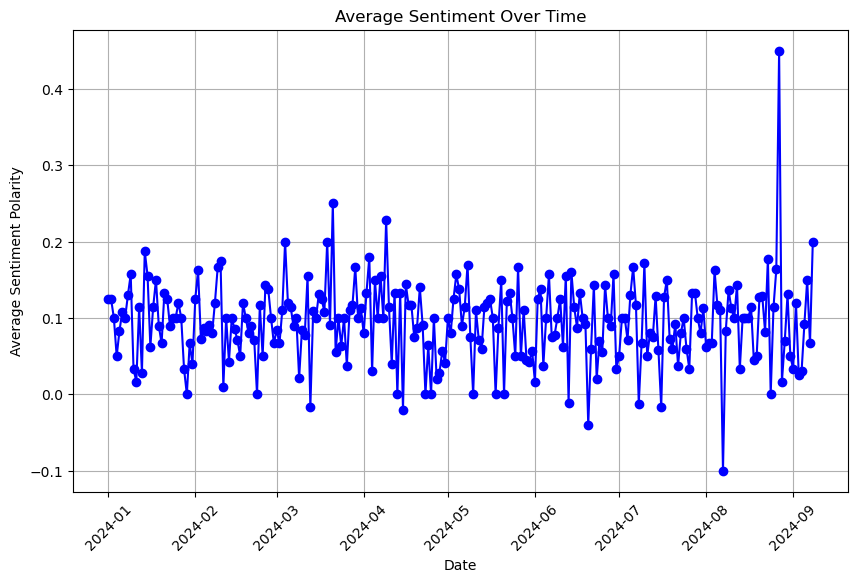

In [18]:
# Convert 'Post Date and Time' to datetime format
data['Post Date and Time'] = pd.to_datetime(data['Post Date and Time'], format='%m/%d/%Y %H:%M')

# Extract date for better visualization
data['Date'] = data['Post Date and Time'].dt.date

# Group by date and calculate average sentiment polarity per day
daily_sentiment = data.groupby('Date')['Sentiment_Polarity'].mean()

# Plot the sentiment trend over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
daily_sentiment.plot(kind='line', color='blue', marker='o')
plt.title("Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


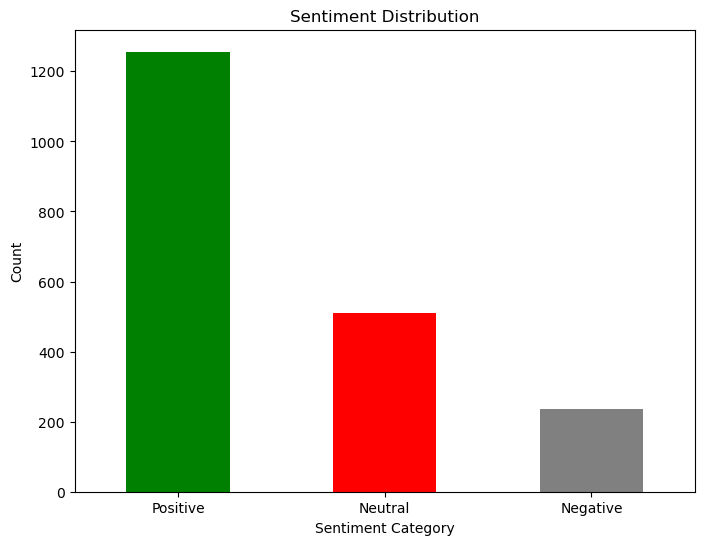

In [19]:
# Define sentiment categories based on polarity
data['Sentiment_Category'] = data['Sentiment_Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Plot sentiment distribution
plt.figure(figsize=(8,6))
data['Sentiment_Category'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [42]:
# Save the data with sentiment scores to a new xlsx
data.to_excel("processed_social_media_sentiment.xlsx", index=False)


